1. Iris 데이터 셋을 활용해 클래스 별 변수 평균 차이 검정

1-1.Iris 데이터셋 불러오기, 구조 산출

In [24]:
import seaborn as sns
iris=sns.load_dataset('iris')
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [25]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


1-2 기술 통계량 산출

In [26]:
print(iris.describe())  # 기술 통계량 출력력

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


1-3. 시각화

<Axes: xlabel='species', ylabel='petal_length'>

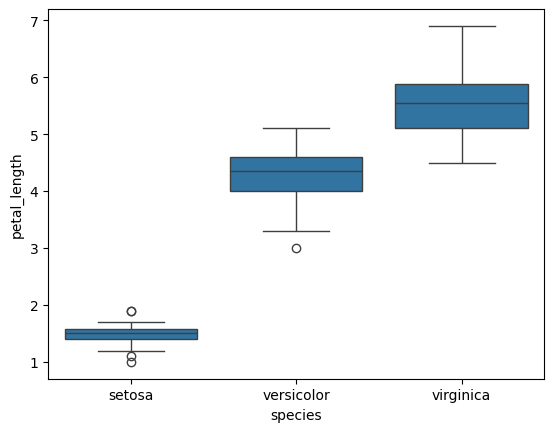

In [27]:
sns.boxplot(y=iris['petal_length'], x=iris['species'])

이를 통해 setosa의 petal_length 중앙값이 제일 작고, virginica의 petal_length 중앙값이 가장 큰 것을 알 수 있다.

1-4. 정규성검정

귀무가설 H0: 종 x의 petal_length는 정규분포를 따른다
대립가설 H1: 종 x의 petal_length는 정규분포를 따르지 않는다.

In [28]:
import scipy.stats
setosa=iris[iris['species']=='setosa'] #setosa 필터링
versicolor=iris[iris['species']=='versicolor']
virginica=iris[iris['species']=='virginica']

#setosa
w,p=scipy.stats.shapiro(setosa['petal_length'])
if p<=0.05:
    print("setosa의 petal length는 정규분포를 따르지 않습니다")
else:
    print("setosa의 petal length는 정규분포를 따릅니다")

#versicolor_species

w,p=scipy.stats.shapiro(versicolor['petal_length'])
if p<=0.05:
    print("versicolor의 petal length는 정규분포를 따르지 않습니다")
else:
    print("versicolor의 petal length는 정규분포를 따릅니다")

#virginica

w,p=scipy.stats.shapiro(virginica['petal_length'])
if p<=0.05:
    print("virginica의 petal length는 정규분포를 따르지 않습니다")
else:
    print("virginica의 petal length는 정규분포를 따릅니다")





setosa의 petal length는 정규분포를 따릅니다
versicolor의 petal length는 정규분포를 따릅니다
virginica의 petal length는 정규분포를 따릅니다


1-5. 등분산성 검정

H0: 집단의 분산이 같다.
H1: 집단의 분산이 다르다.

In [29]:
stat,p= scipy.stats.levene(setosa['petal_length'], versicolor['petal_length'], virginica['petal_length'])
if p>0.05:
    print("집합의 분산이 같습니다")

else:
    print("집합의 분산이 다릅니다")


집합의 분산이 다릅니다


1-6. ANOVA 검정

H0: 모든 그룹의 평균이 동일합니다.

H1: 적어도 한 그룹의 평균이 다릅니다.



In [30]:
f, p= scipy.stats.f_oneway(setosa['petal_length'], versicolor['petal_length'], virginica['petal_length'])
if p<=0.05:
    print("setosa, versicolor, virginica중 적어도 한 그룹의 평균이 유의미하게 다릅니다")
else:
    print("세 그룹의 평균이 동일합니다.")

setosa, versicolor, virginica중 적어도 한 그룹의 평균이 유의미하게 다릅니다


1-7. tukey's HSD test

In [31]:
import statsmodels.stats.multicomp as mc

tukey=mc.pairwise_tukeyhsd(endog=iris["petal_length"],groups=iris["species"],alpha=0.05)
print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


세 집단 모두 reject값이 True이므로, 세 그룹의 평균이 유의미하게 쌍마다 다르다.

결과 요약

ANOVA, 사후검정 결과 세 집단의 평균이 쌍마다 다름을 확인하였다. Boxplot 시각화를 토대로 데이터를 분석해보면 petal_length는 Viginica > versicolor > setosa 임을 알 수 있다. 

2. 실제 신용 카드 사기 데이터 셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

2-1. 데이터 로드 및 기본 탐색

In [32]:
import pandas as pd
df= pd.read_csv("creditcard.csv") #creditcard csv

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [34]:
print(df["Class"].value_counts(normalize=True)*100) 

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


2-2. 샘플링

In [35]:
df_fraud=df[df["Class"]==1]
df_normal=df[df["Class"]==0].sample(n=10000, random_state=42)
df_sampled=pd.concat([df_fraud, df_normal],axis=0) # axis:0 의미: 행 방향 세로(아래로 붙임임)
print(df_sampled["Class"].value_counts(normalize=True)*100)

Class
0    95.310713
1     4.689287
Name: proportion, dtype: float64


2-3. 데이터 전처리

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df["Amount"]=scaler.fit_transform(df[["Amount"]]) #최소 2차원 요구
X= df.drop("Class", axis=1) #독립변수

y=df["Class"] #종속변수


In [37]:
print(X.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [38]:
print(y.describe())

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


2-4. 학습 데이터와 테스트 데이터 분할

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


2-5. SMOTE 적용  
SMOTE 적용이유: 소수 클래스(1)이 너무 적음(0.1%) -> 소수 클래스를 생성해 균형을 맞추는 oversampling 필요 -> SMOTE!

In [40]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_smoted,y_smoted=smote.fit_resample(X_train,y_train)
print(y_smoted.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


2-6. 모델 학습   
로지스틱 회귀 사용

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score
lg=LogisticRegression(C=1.0, max_iter=2000, solver='liblinear', penalty='l1')
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
y_proba=lg.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, digits=4))

pr_auc=average_precision_score(y_test,y_proba)
print("pr_auc: ",pr_auc)


              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

pr_auc:  0.7439799579262683


2-7. 최종성능 평가

class 0 에 대해서는 성공했으나, class 1에 경우 recall, f1, pr-auc를 충족시키지 못했다. 이를 위해서는 하이퍼파라미터 값들을 조정하거나, 로지스틱 회귀가 아닌 다른 모델들을 사용해야한다.